# Regression Analysis - part 3

Use some variables of the dataset to perform regression analysis. You should identify the key variables that
influence employee’s productivity.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/janet.xuishi/Documents/DA_L7/CA2.0_stats_garments_worker_productivity.csv")
#df.head()

In [2]:
# We need to select relevant columns to define our variables
var_columns = df.select_dtypes(include = [np.number]).columns.tolist()
var_columns.remove("actual_productivity")
print(var_columns)

['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


In [3]:
# We are using numeric variables as potential predictors.
# X are indepent variables, y is the dependent variable
X = df[var_columns]
y = df["actual_productivity"]
# print(X,y)

In [4]:
# Import library
# We need to split the data into training and testing. 
# In this CA, we use 80% to train and 20% of data to test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
# Import library
# Create regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [6]:
# Plug in the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predicting values for the test set
y_pred = regressor.predict(X_test)

In [8]:
# Score the model based on the training data
training_score = regressor.score(X_train, y_train)

In [9]:
coefficients = regressor.coef_

In [10]:
# To list out the numeric variables as potential predictors: 
coeff_df = round(pd.DataFrame(coefficients, X.columns, columns = ["Coefficient"]),5)
print(coeff_df)

# print out training scores
print(f"The trained score is at: {training_score}")

                       Coefficient
team                      -0.00394
targeted_productivity      0.64915
smv                       -0.00319
wip                       -0.00000
over_time                 -0.00000
incentive                  0.00288
idle_time                  0.00034
idle_men                  -0.00741
no_of_style_change        -0.00046
no_of_workers              0.00122
The trained score is at: 0.8177377944594191


In [11]:
# Create visualization to better understand the major influence variable/s and minor influence variable/s

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style = "whitegrid")
# Create the Coefficient data frame for visualization
coeff_df = pd.DataFrame({
    "Variable": ["team",
                 "targeted_productivity",
                 "smv",
                 "wip",
                 "over_time",
                 "incentive",
                 "idle_time",
                 "idle_men",
                 "no_of_style_change",
                 "no_of_workers"
                ],
 "Coefficient": [-0.00394,
                0.64915,
                -0.00319,
                -0.00000,
                -0.00000,
                0.00288,
                0.00034,
                -0.00741,
                -0.00046,
                0.00122
                 ]
})

In [14]:
# Sort the Data Frame based on absolute value of coefficients for better visual presentation
coeff_df["abs_coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by = "abs_coefficient", 
                                ascending = False).drop("abs_coefficient",axis = 1)

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


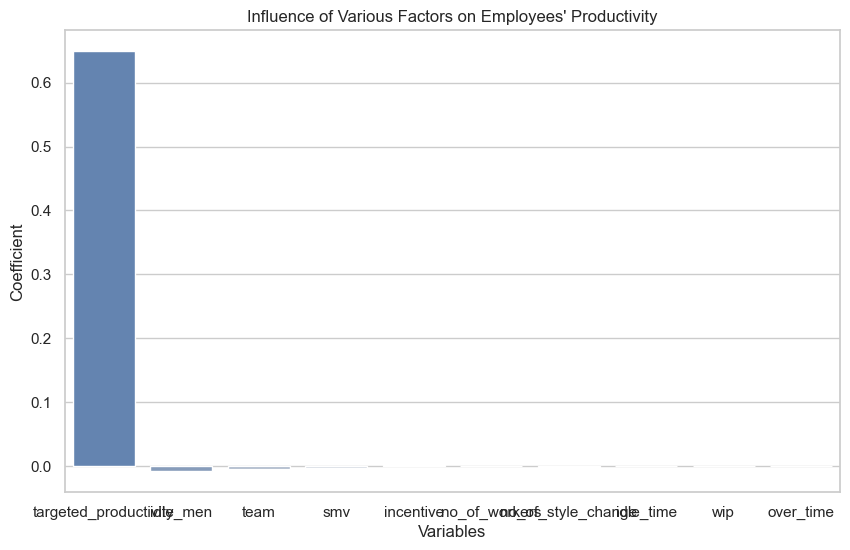

In [15]:
# Create a bar plot
plt.figure(figsize = (10,6))
sns.barplot(y = "Coefficient", 
            x = "Variable", data = coeff_df, palette = "vlag")
# Titles and labels definition 
plt.title("Influence of Various Factors on Employees' Productivity")
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.show()

Conclusion of model:
The model trained score is at: 0.8177377944594191 ( 81.77% ), indicates model is doing a good job capturing variation in productivity based on given independent variables.
Coefficients results:
There are mix of positive and negative coefficient values, the "targeted_productivity" at 0.649 indicates a positive effect on productivity. The other positive coefficient values are not as high as 0.649 to significantly impact the actual productivity, however it should not be ignored in the real world.

Text(0, 0.5, 'Actual Productivity')

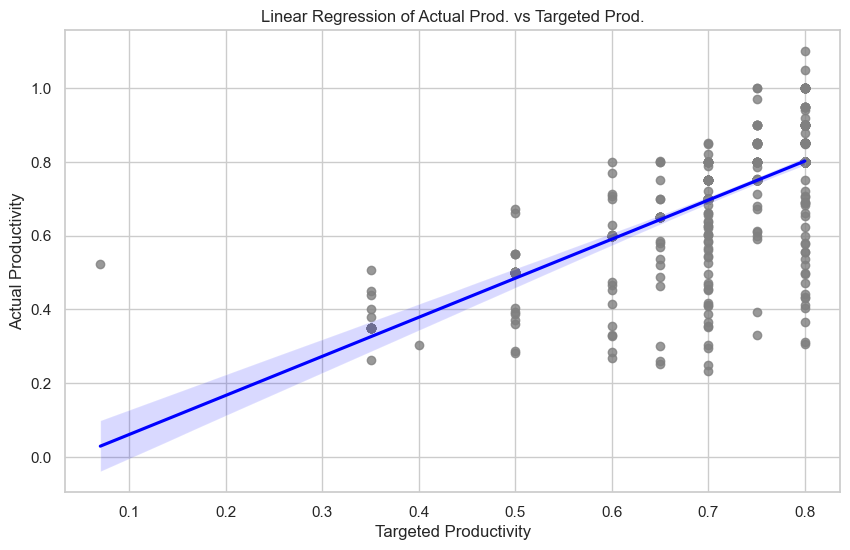

In [16]:
# Perform Regression Analysis use scatter plot to draw a regression line
plt.figure(figsize = (10,6))
sns.regplot(x = "targeted_productivity",
            y = "actual_productivity",
            data = df,
            scatter_kws = {"color": "grey"},
            line_kws = {"color": "blue"})
# Titles and labels definition 
plt.title("Linear Regression of Actual Prod. vs Targeted Prod.")
plt.xlabel("Targeted Productivity")
plt.ylabel("Actual Productivity")

Conclusion of Regression Analysis:
This scatter plot visualization shows the actual productivity vs targeted productivity. The grey dots are the different variables in the csv data file.The Regression blue line is pointing upwards, indicates a strong impact of targeted productivity on actual productivity between the targeted and actual productivity. 